# 演習７　最小二乗法とThiknonovの正則化

## 課題
以下に与えられたコードは，$u_0 =  K\hat{u} + n$の左辺$u_0$（観測画像）から真の画像$\hat{u}$を最小二乗法を使って

$u^* = (K^\top K)^{-1}K^\top u_0$ 

のように推定しようとするものである．講義中に説明した理由により，ノイズ$n$が加算されているときにこれは望ましい結果をうまない．このコードを
Thikhonovの正則化を使った推定：

$u^* = (K^\top K+\lambda \Delta)^{-1}K^\top u_0$ 

へと拡張せよ．$\lambda=0.01$としておくとよい．


In [ ]:
!git clone https://github.com/mdipcit/standard_images/

Cloning into 'standard_images'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (10/10), done.


In [ ]:
cd standard_images/

/content/standard_images


In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image

In [ ]:
# parameters
sigma = 0.005 #ノイズの標準偏差
lamb = 0.01 #Thikhonov正則化項の係数

In [ ]:
uh= np.asarray(Image.open('pepper.png')).astype(float)/255.0

フィルタ$K$の定義．ここでは$5\times 5$の平均値フィルタとしている

In [ ]:
K = np.zeros(uh.shape)
K[0:3, 0:3] = 1/25
K[0:3, -2:] = 1/25 #-2は最後から2番目のインデックス．範囲指定の後半を省略するとリストの最後まで，という意味になる
K[-2:, 0:3] = 1/25
K[-2:, -2:] = 1/25

In [ ]:
#ノイズベクトル
n = np.random.randn(*uh.shape)*sigma

In [ ]:
uhf = np.fft.fft2(uh)
Kf  = np.fft.fft2(K)

#観測のシミュレーション
u0  = np.real(np.fft.ifft2(uhf*Kf))+n
u0f = np.fft.fft2(u0)

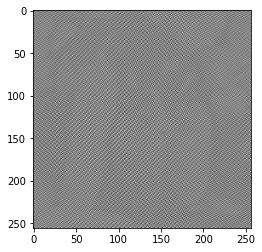

In [ ]:
# 最小二乗法
nlsq = np.fft.ifft2(u0f*np.conj(Kf)/(Kf*np.conj(Kf)))

#結果表示
plt.imshow(np.real(nlsq),cmap='gray')